Task #1: Predict the percentage of student based on the no. of study hours

Task 1 : The Sparks Foundation May'21
Prediction using Supervised ML

Description : Predict the percentage of an student based on the no. of study hours.

Dataset : http://bit.ly/w-data

Done by : Rutuja Gurav

Language used  : Python


In [1]:
# Importing all nessesary libraries required for this task
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



C:\Users\Adwait\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Adwait\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#de

In [2]:
# importing data 
url = "http://bit.ly/w-data"
data = pd.read_csv("http://bit.ly/w-data")
print ("Data import successfully")
data.head(5)


Data import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Print shape of data 
print(data.shape)

(25, 2)


In [4]:
# Check for missing data 
total = data.isnull().sum().sort_values(ascending = False)
print(total)



Hours     0
Scores    0
dtype: int64


In [5]:
# Describe dataset
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


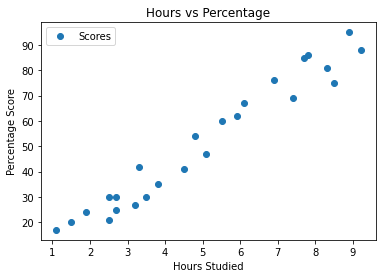

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

There is positive linear relation between the number of hours studied and percentage of score.


Preparing the Data


In [41]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values



Splitting the dataset into test and training datasets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,test_size = 0.3, random_state = 0)

In [43]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

print("Training complete")

Training complete


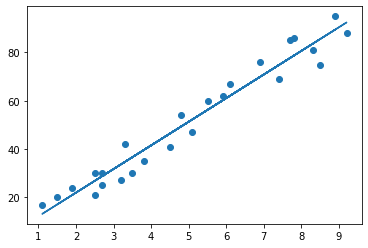

In [44]:
#plotting the regression line
line=regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [46]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [47]:
#Now testing with our given task 
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477057



Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [48]:

print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE test score:", regressor.score(x,y))



Mean absolute error: 4.419727808027654
RMSE test score: 0.9529426789332803
